In [3]:
# basic module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil
import glob
import time
import pickle

plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = False


# image module
import cv2
from pydicom import dcmread
import pylibjpeg
from PIL import Image
import pydicom as dcm
from pydicom import dcmread
from pydicom.data import get_testdata_file



# dataset
df = pd.read_csv('dataset.csv',index_col=0)

#### Converting

In [3]:
def crop(path):
    img= cv2.imread(path)
    # gray scale
    img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # threshold
    _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
    # contour 잡기 (윤곽선은 투명)
    contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)
    
    # --------------------------------------------------------
    # contour[0]의 x,y min,max
    contours_min_0 = np.argmin(contours[0], axis=0)
    contours_max_0 = np.argmax(contours[0], axis=0)

    x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
    y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
    x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
    y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

    # contour[1]의 x,y min,max
    contours_min_1 = np.argmin(contours[1], axis=0)
    contours_max_1 = np.argmax(contours[1], axis=0)

    x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
    y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
    x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
    y_Max_1 = contours[1][contours_max_1[0][1]][0][1]
    
    # --------------------------------------------------------
    
    if x_Min_0 < x_Min_1:  # x_Min_0이 작으면 
        x_Min = x_Min_0    # x_Min_0이 min값 
    else :
        x_Min = x_Min_1    # 같거나 크면 x_Min_1 min값

    if x_Max_0 > x_Max_1:  # x_Max_0이 크면 
        x_Max = x_Max_0    # x_Max_0이 max값 
    else :
        x_Max = x_Max_1    #같거나 크면 x_Max_1이 max값

    if y_Min_0 < y_Min_1:  # y_Min_0이 작으면 
        y_Min = y_Min_0    # y_Min_0이 min값 
    else :
        y_Min = y_Min_1    #같거나 크면 y_Min_1이 min값


    if y_Max_0 > y_Max_1:  # y_Max_0이 크면 
        y_Max = y_Max_0    # y_Max_0이 max값 
    else :
        y_Max = y_Max_1    #같거나 크면 y_Max_1이 max값
    
    img_trim = img[y_Min:y_Max, x_Min:x_Max]
    
    return img_trim

### Folder

In [5]:
cd ..

/home/ncp/workspace


In [6]:
cd data

/home/ncp/workspace/data


In [6]:
# mkdir crop

In [7]:
# cd crop

/home/ncp/workspace/data/crop


In [9]:
# mkdir d1

In [10]:
# mkdir d2

In [11]:
# mkdir d3

In [12]:
# mkdir d4

In [13]:
# mkdir d5

In [14]:
# mkdir d6

In [15]:
# mkdir d9

In [9]:
cd crop

/home/ncp/workspace/data/crop


In [10]:
ls

d0/  d1/  d2/  d3/  d4/  d5/  d6/


#### check

In [4]:
# image_path
d1p = '/home/ncp/workspace/data/DL/d1/'
d2p = '/home/ncp/workspace/data/DL/d2/'
d3p = '/home/ncp/workspace/data/DL/d3/'
d4p = '/home/ncp/workspace/data/DL/d4/'
d5p = '/home/ncp/workspace/data/DL/d5/'
d6p = '/home/ncp/workspace/data/DL/d6/'
d0p = '/home/ncp/workspace/data/DL/d0/'

In [5]:
f1 = os.listdir('/home/ncp/workspace/data/DL/d1')
f2 = os.listdir('/home/ncp/workspace/data/DL/d2')
f3 = os.listdir('/home/ncp/workspace/data/DL/d3')
f4 = os.listdir('/home/ncp/workspace/data/DL/d4')
f5 = os.listdir('/home/ncp/workspace/data/DL/d5')
f6 = os.listdir('/home/ncp/workspace/data/DL/d6')
f0 = os.listdir('/home/ncp/workspace/data/DL/d0')

folders = [f1,f2,f3,f4,f5,f6,f0]
fdpath = '/home/ncp/workspace/data/DL/'

In [6]:
len(f1 + f2 + f3 + f4 + f5 + f6 + f0) # f1 -ch f4 // check point rmdir

4002

In [69]:
img_f1 = []
for name in f1:
    img_f1.append(d1p+name)
    
img_f2 = []
for name in f2:
    img_f2.append(d2p+name)
    
img_f3 = []
for name in f3:
    img_f3.append(d3p+name)
    
img_f4 = []
for name in f4:
    img_f4.append(d4p+name)
    
img_f5 = []
for name in f5:
    img_f5.append(d5p+name)
    
img_f6 = []
for name in f6:
    img_f6.append(d6p+name)
    
img_f0 = []
for name in f0:
    img_f0.append(d0p+name)

In [70]:
len(img_f1+img_f2+img_f3+img_f4+img_f5+img_f6+img_f0)
folders = [img_f1,img_f2,img_f3,img_f4,img_f5,img_f6,img_f0]

In [74]:
complete = []
error = []
for folder in folders:
    for  img_path in folder:
        try:
            if 'd1' in img_path:
                fdname = 'd1'
            elif 'd2' in img_path:
                fdname = 'd2'
            elif 'd3' in img_path:
                fdname = 'd3'
            elif 'd4' in img_path:
                fdname = 'd4'
            elif 'd5' in img_path:
                fdname = 'd5'
            elif 'd6' in img_path:
                fdname = 'd6'
            elif 'd0' in img_path:
                fdname = 'd0'
            
            save_fname = img_path.split('DL/')[0]+'crop/'+fdname+img_path.split(fdname)[1]
            cropimg = crop(img_path)
            
            plt.imsave(save_fname,cropimg)
            print('[원]',img_path,'        [저장]',save_fname,'        [완료]')
            complete.append(fdname)
            
        except Exception as e:
            print('\n',e)
            print(img_path,'      [오류]')
            error.append(img_path)

            

[원] /home/ncp/workspace/data/DL/d1/H05_00835_02.png         [저장] /home/ncp/workspace/data/crop/d1/H05_00835_02.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H05_00799_01.png         [저장] /home/ncp/workspace/data/crop/d1/H05_00799_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H03_00488_01.png         [저장] /home/ncp/workspace/data/crop/d1/H03_00488_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H13_00157_01.png         [저장] /home/ncp/workspace/data/crop/d1/H13_00157_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H05_00917_02.png         [저장] /home/ncp/workspace/data/crop/d1/H05_00917_02.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H01_00056_01.png         [저장] /home/ncp/workspace/data/crop/d1/H01_00056_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H08_00549_01.png         [저장] /home/ncp/workspace/data/crop/d1/H08_00549_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H03_00490_01.png         [저장] /home/ncp/workspace/data/crop/d1/H03_00

In [78]:
error

['/home/ncp/workspace/data/DL/d1/H04_02478_01.png',
 '/home/ncp/workspace/data/DL/d1/H01_00077_01.png',
 '/home/ncp/workspace/data/DL/d1/H04_00255_01.png',
 '/home/ncp/workspace/data/DL/d1/H04_00282_01.png',
 '/home/ncp/workspace/data/DL/d1/H04_00283_02.png',
 '/home/ncp/workspace/data/DL/d1/H04_02490_02.png',
 '/home/ncp/workspace/data/DL/d1/H13_00081_02.png',
 '/home/ncp/workspace/data/DL/d1/H04_02479_02.png',
 '/home/ncp/workspace/data/DL/d2/H04_02146_01.png',
 '/home/ncp/workspace/data/DL/d3/H13_01253_02.png',
 '/home/ncp/workspace/data/DL/d3/H13_01252_01.png',
 '/home/ncp/workspace/data/DL/d3/H13_01792_01.png',
 '/home/ncp/workspace/data/DL/d3/H13_01441_02.png',
 '/home/ncp/workspace/data/DL/d3/H04_01313_01.png',
 '/home/ncp/workspace/data/DL/d4/H04_00133_01.png',
 '/home/ncp/workspace/data/DL/d4/H05_00201_02.png',
 '/home/ncp/workspace/data/DL/d5/H13_00040_01.png',
 '/home/ncp/workspace/data/DL/d6/H05_02284_01.png',
 '/home/ncp/workspace/data/DL/d6/H04_01266_01.png',
 '/home/ncp/

In [107]:
def crop(path):
    img= cv2.imread(path)
    # gray scale
    img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # threshold
    _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
    # contour 잡기 (윤곽선은 투명)
    contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)
    
    # --------------------------------------------------------
    # contour[0]의 x,y min,max
    try:
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        # contour[1]의 x,y min,max
        contours_min_1 = np.argmin(contours[1], axis=0)
        contours_max_1 = np.argmax(contours[1], axis=0)

        x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
        y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
        x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
        y_Max_1 = contours[1][contours_max_1[0][1]][0][1]
    except Exception as e:
        print(e)
        ontours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

    except Exception as e:
                # contour[1]의 x,y min,max
        contours_min_1 = np.argmin(contours[1], axis=0)
        contours_max_1 = np.argmax(contours[1], axis=0)

        x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
        y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
        x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
        y_Max_1 = contours[1][contours_max_1[0][1]][0][1]
    # --------------------------------------------------------
    
    if x_Min_0 < x_Min_1:  # x_Min_0이 작으면 
        x_Min = x_Min_0    # x_Min_0이 min값 
    else :
        x_Min = x_Min_1    # 같거나 크면 x_Min_1 min값

    if x_Max_0 > x_Max_1:  # x_Max_0이 크면 
        x_Max = x_Max_0    # x_Max_0이 max값 
    else :
        x_Max = x_Max_1    #같거나 크면 x_Max_1이 max값

    if y_Min_0 < y_Min_1:  # y_Min_0이 작으면 
        y_Min = y_Min_0    # y_Min_0이 min값 
    else :
        y_Min = y_Min_1    #같거나 크면 y_Min_1이 min값


    if y_Max_0 > y_Max_1:  # y_Max_0이 크면 
        y_Max = y_Max_0    # y_Max_0이 max값 
    else :
        y_Max = y_Max_1    #같거나 크면 y_Max_1이 max값
    
    img_trim = img[y_Min:y_Max, x_Min:x_Max]
    
    return img_trim

In [108]:
error

['/home/ncp/workspace/data/DL/d1/H04_02478_01.png',
 '/home/ncp/workspace/data/DL/d1/H01_00077_01.png',
 '/home/ncp/workspace/data/DL/d1/H04_00255_01.png',
 '/home/ncp/workspace/data/DL/d1/H04_00282_01.png',
 '/home/ncp/workspace/data/DL/d1/H04_00283_02.png',
 '/home/ncp/workspace/data/DL/d1/H04_02490_02.png',
 '/home/ncp/workspace/data/DL/d1/H13_00081_02.png',
 '/home/ncp/workspace/data/DL/d1/H04_02479_02.png',
 '/home/ncp/workspace/data/DL/d2/H04_02146_01.png',
 '/home/ncp/workspace/data/DL/d3/H13_01253_02.png',
 '/home/ncp/workspace/data/DL/d3/H13_01252_01.png',
 '/home/ncp/workspace/data/DL/d3/H13_01792_01.png',
 '/home/ncp/workspace/data/DL/d3/H13_01441_02.png',
 '/home/ncp/workspace/data/DL/d3/H04_01313_01.png',
 '/home/ncp/workspace/data/DL/d4/H04_00133_01.png',
 '/home/ncp/workspace/data/DL/d4/H05_00201_02.png',
 '/home/ncp/workspace/data/DL/d5/H13_00040_01.png',
 '/home/ncp/workspace/data/DL/d6/H05_02284_01.png',
 '/home/ncp/workspace/data/DL/d6/H04_01266_01.png',
 '/home/ncp/

In [99]:
labels[0]

0

1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range
1 tuple index out of range


IndexError: tuple index out of range

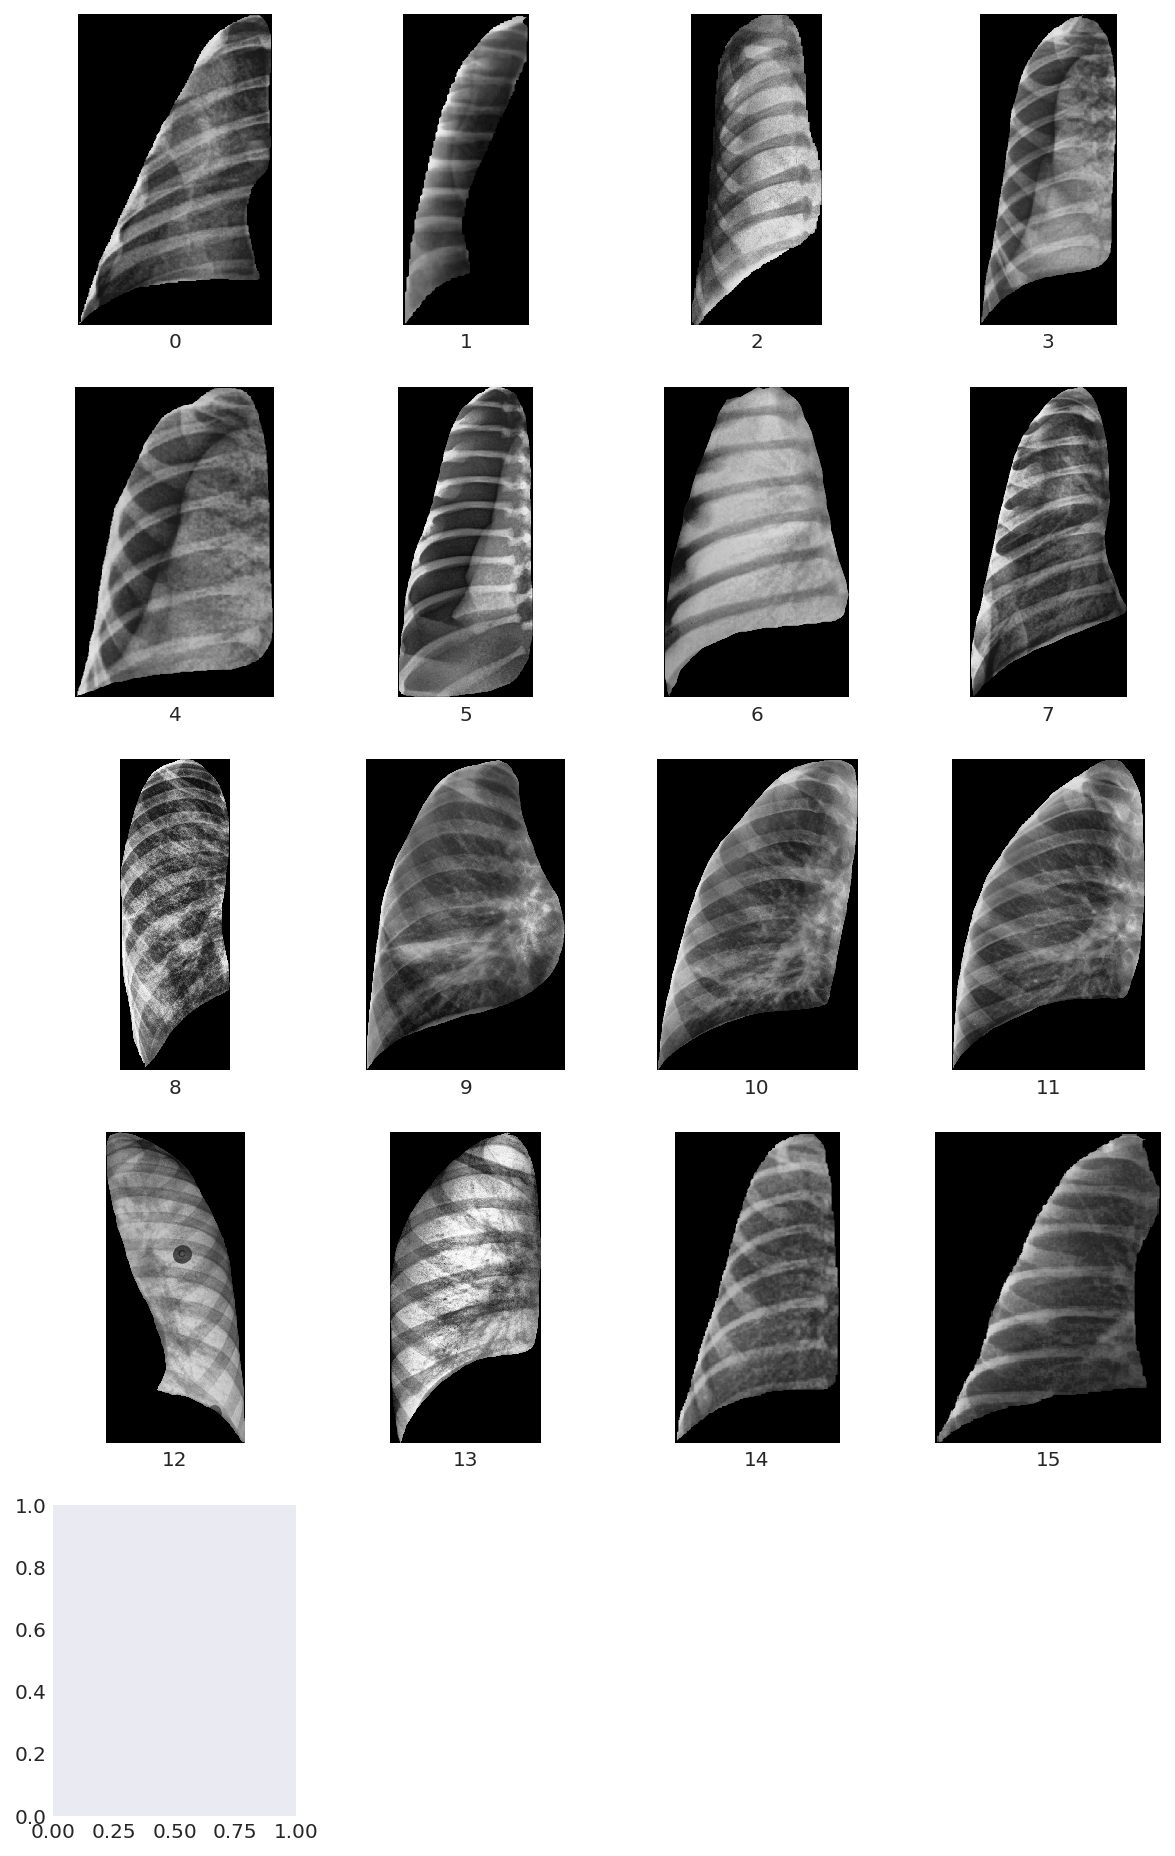

In [148]:
fig = plt.figure(figsize=(10,20))
rows = 6
cols = 4
j = 1

labels = list(range(25))


for i,err in enumerate(error):
    img = cv2.imread(err)
    ax = fig.add_subplot(rows,cols,j)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    _, img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)
    
    try:
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)
        
        contours_min_1 = np.argmin(contours[1], axis=0)
        contours_max_1 = np.argmax(contours[1], axis=0)


        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        # contour[1]의 x,y min,max

        x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
        y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
        x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
        y_Max_1 = contours[1][contours_max_1[0][1]][0][1]
        
        if x_Min_0 < x_Min_1:  # x_Min_0이 작으면 
            x_Min = x_Min_0    # x_Min_0이 min값 
        else :
            x_Min = x_Min_1    # 같거나 크면 x_Min_1 min값

        if x_Max_0 > x_Max_1:  # x_Max_0이 크면 
            x_Max = x_Max_0    # x_Max_0이 max값 
        else :
            x_Max = x_Max_1    #같거나 크면 x_Max_1이 max값

        if y_Min_0 < y_Min_1:  # y_Min_0이 작으면 
            y_Min = y_Min_0    # y_Min_0이 min값 
        else :
            y_Min = y_Min_1    #같거나 크면 y_Min_1이 min값


        if y_Max_0 > y_Max_1:  # y_Max_0이 크면 
            y_Max = y_Max_0    # y_Max_0이 max값 
        else :
            y_Max = y_Max_1    #같거나 크면 y_Max_1이 max값

        img_trim = img[y_Min:y_Max, x_Min:x_Max]
        
    except Exception as e:
        print('1',e)
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]
        
        img_trim = img[y_Min_0:y_Max_0, x_Min_0:x_Max_0]

    except Exception as e:
        print('2',e)
                # contour[1]의 x,y min,max
        contours_min_1 = np.argmin(contours[1], axis=0)
        contours_max_1 = np.argmax(contours[1], axis=0)

        x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
        y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
        x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
        y_Max_1 = contours[1][contours_max_1[0][1]][0][1]
        
        img_trim = img[y_Min_1:y_Max_1, x_Min_1:x_Max_1]
    # --------------------------------------------------------
    

    ax.imshow(img_trim)
    ax.set_xlabel(labels[i])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
    j += 1

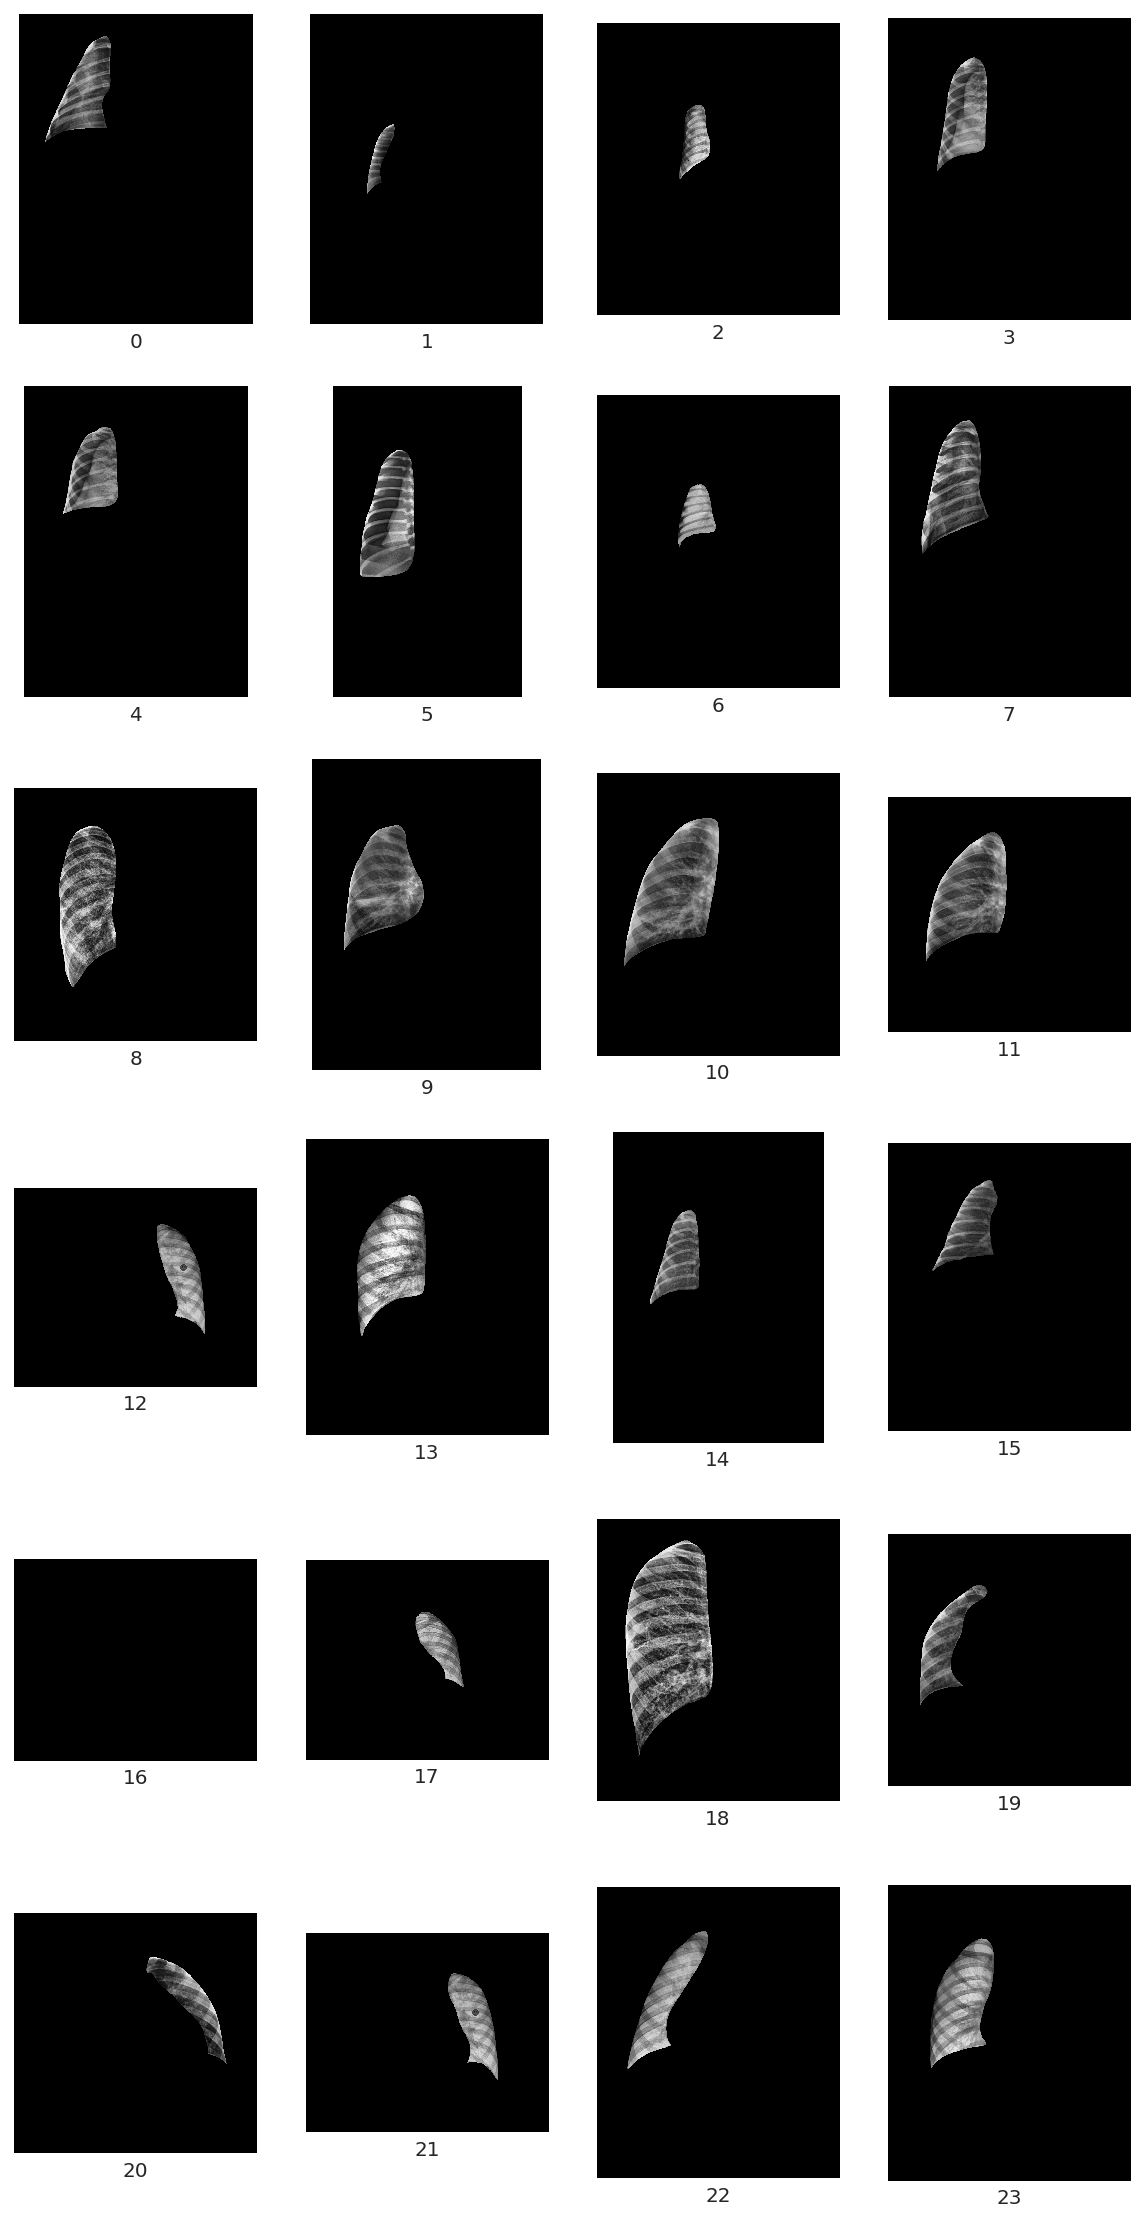

In [125]:
fig = plt.figure(figsize=(10,20))
rows = 6
cols = 4
j = 1

labels = list(range(25))
for i,err in enumerate(error):
    img = cv2.imread(err)
    ax = fig.add_subplot(rows,cols,j)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    _, img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    ax.imshow(cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA))
    ax.set_xlabel(labels[i])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
    j += 1

In [124]:
contours_min_0 = np.argmin(contours[0], axis=0)
contours_max_0 = np.argmax(contours[0], axis=0)

x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

# contour[1]의 x,y min,max
contours_min_1 = np.argmin(contours[1], axis=0)
contours_max_1 = np.argmax(contours[1], axis=0)

x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
y_Max_1 = contours[1][contours_max_1[0][1]][0][1]

IndexError: tuple index out of range

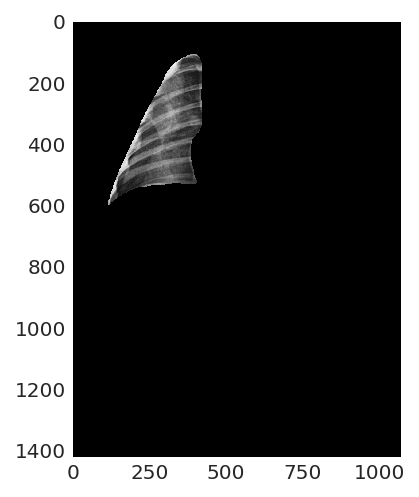

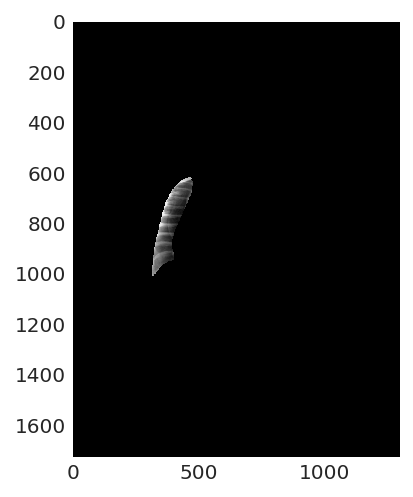

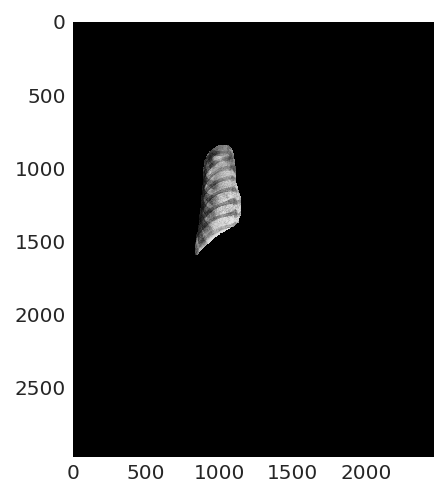

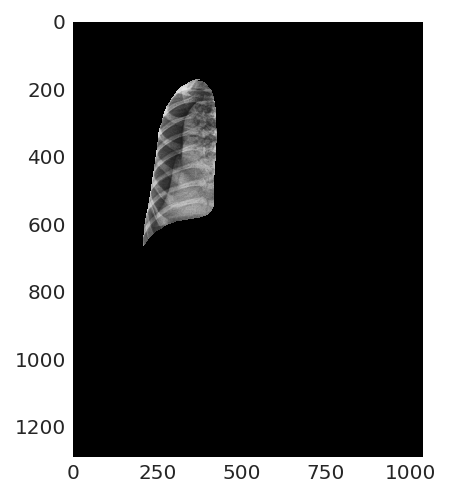

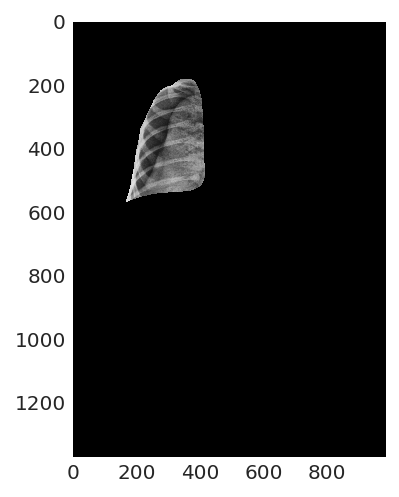

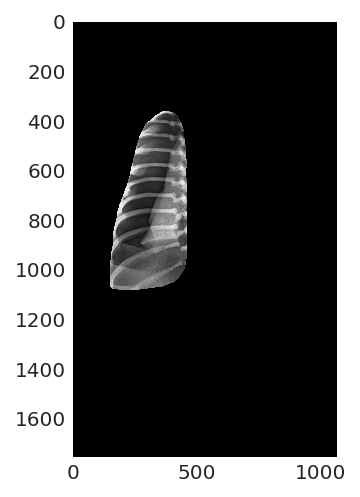

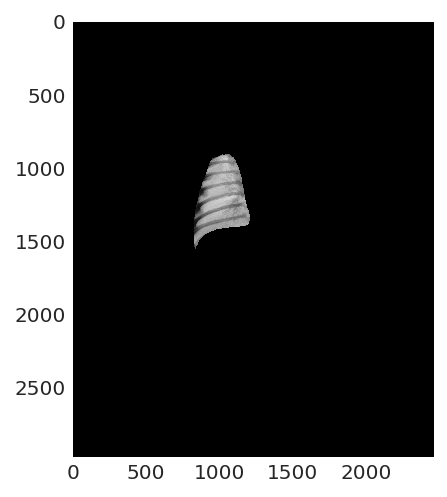

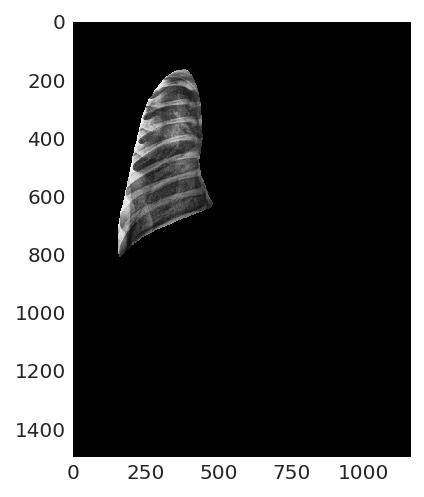

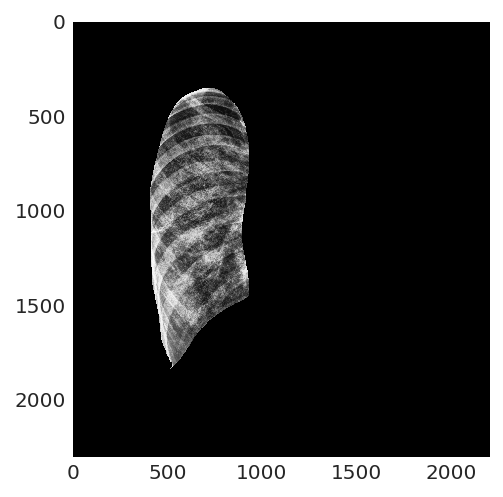

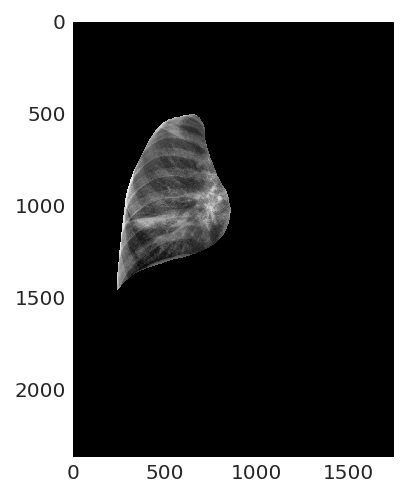

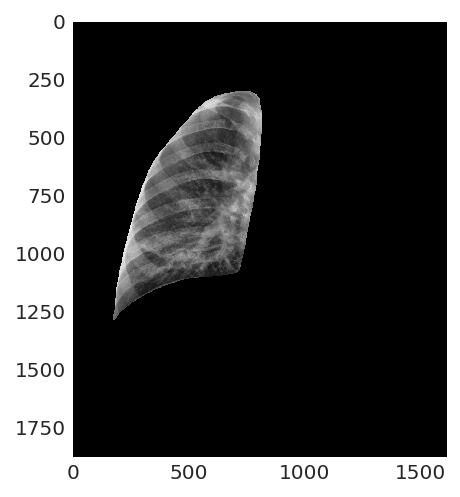

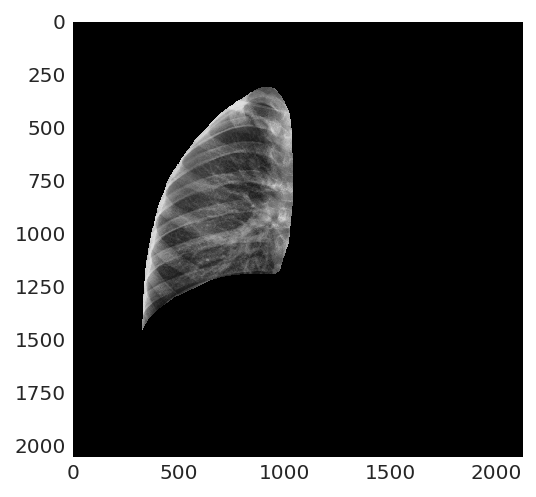

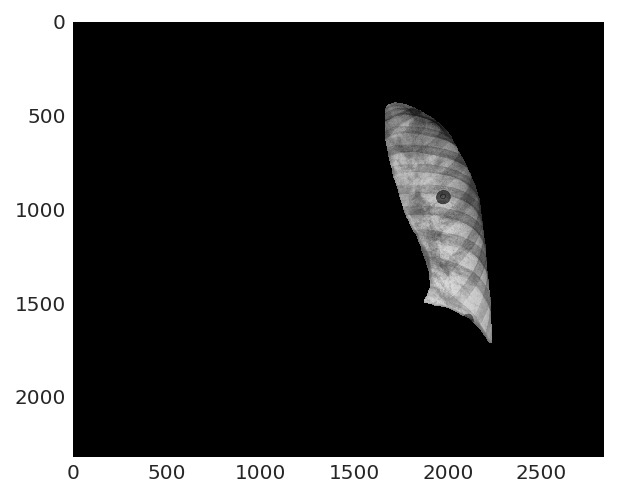

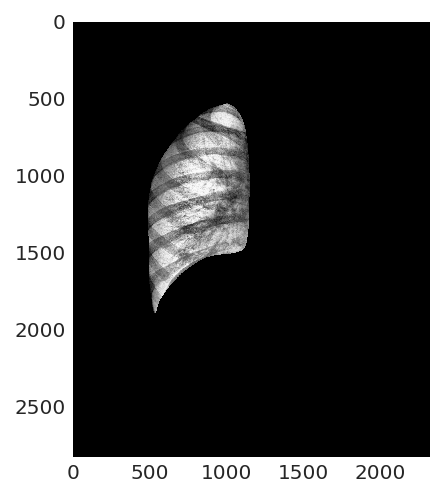

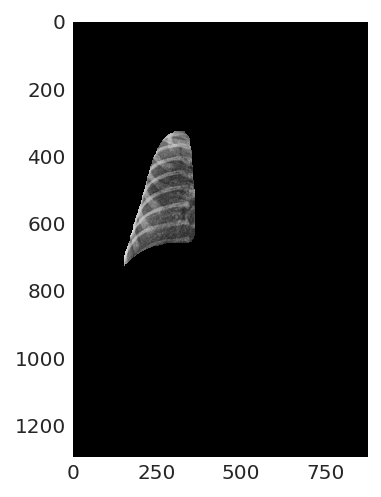

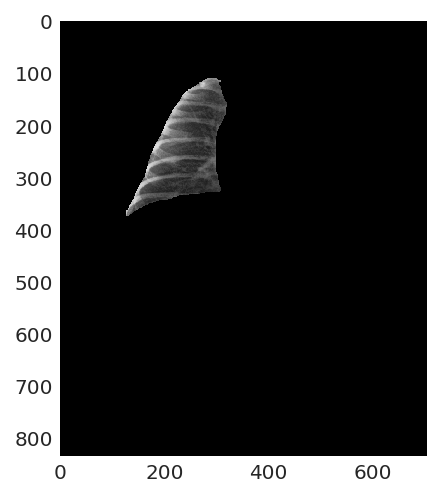

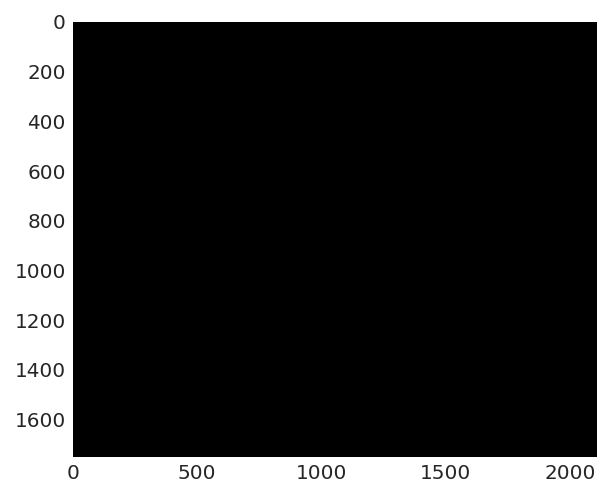

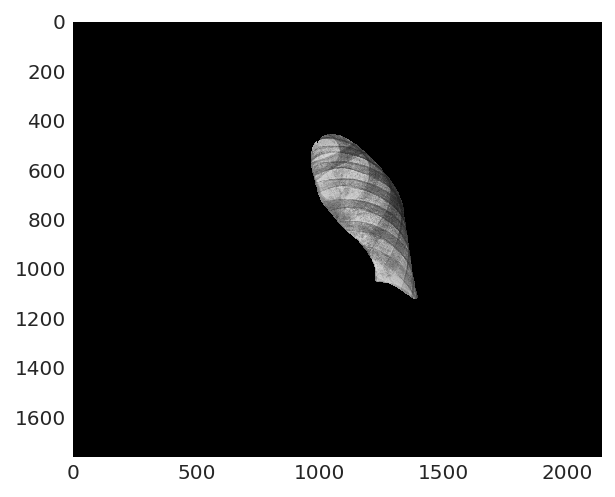

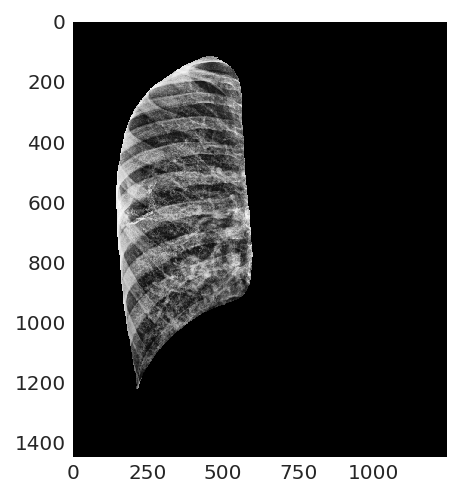

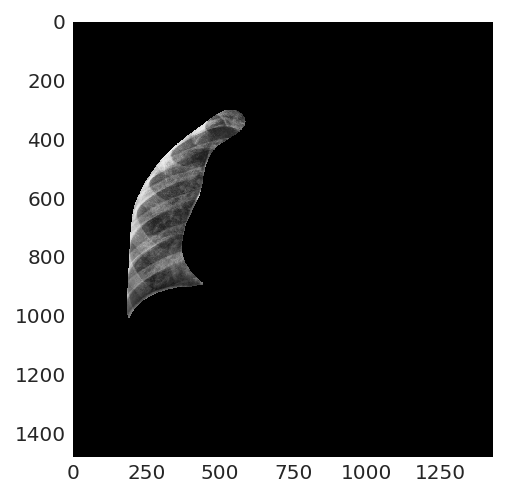

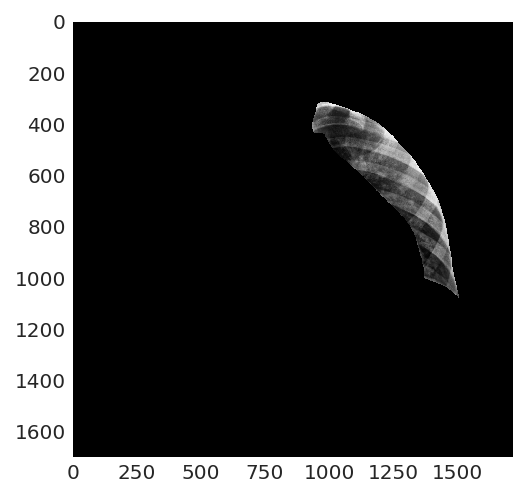

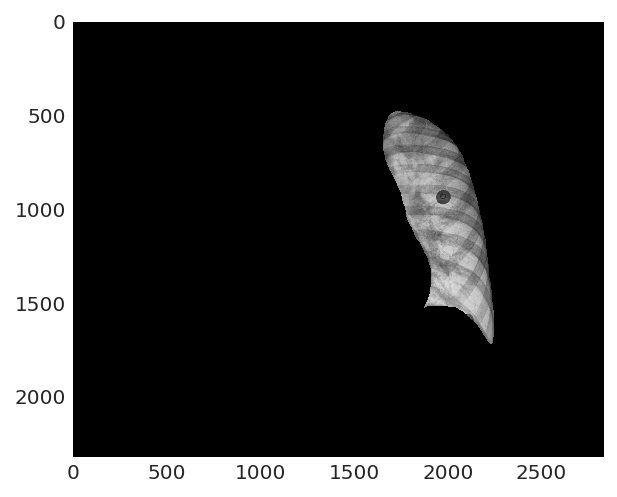

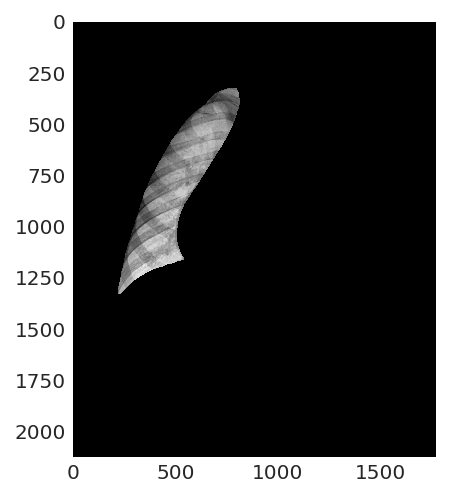

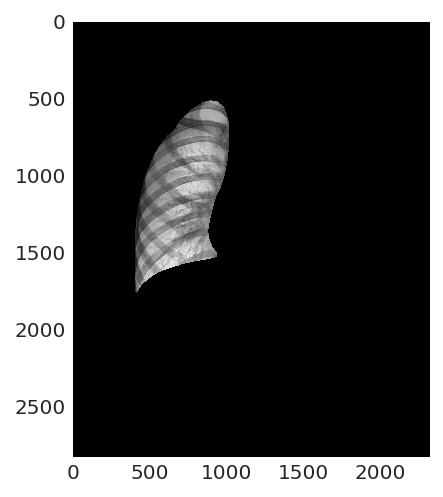

In [106]:
for img in error:
    img= cv2.imread(img)
    plt.imshow(img)
    plt.show()

# crop _error

In [5]:
def crop_error(path):
    img= cv2.imread(path)
    # gray scale
    img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # threshold
    _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
    # contour 잡기 (윤곽선은 투명)
    contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)


    # --------------------------------------------------------
    # contour[0]의 x,y min,max
    contours_min_0 = np.argmin(contours[0], axis=0)
    contours_max_0 = np.argmax(contours[0], axis=0)

    x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
    y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
    x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
    y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

    x_Max = int(x_Max_0+abs(x_Max_0-x_Min_0)*1.5)

    img_trim = img[y_Min_0:y_Max_0, x_Min_0:x_Max]
    
    return img_trim

In [9]:
error_path = ['/home/ncp/workspace/data/DL/d1/H04_02478_01.png',
 '/home/ncp/workspace/data/DL/d1/H01_00077_01.png',
 '/home/ncp/workspace/data/DL/d1/H04_00255_01.png',
 '/home/ncp/workspace/data/DL/d1/H04_00282_01.png',
 '/home/ncp/workspace/data/DL/d1/H04_00283_02.png',
 '/home/ncp/workspace/data/DL/d1/H04_02490_02.png',
 '/home/ncp/workspace/data/DL/d1/H13_00081_02.png',
 '/home/ncp/workspace/data/DL/d1/H04_02479_02.png',
 '/home/ncp/workspace/data/DL/d2/H04_02146_01.png',
 '/home/ncp/workspace/data/DL/d3/H13_01253_02.png',
 '/home/ncp/workspace/data/DL/d3/H13_01252_01.png',
 '/home/ncp/workspace/data/DL/d3/H13_01792_01.png',
 '/home/ncp/workspace/data/DL/d3/H13_01441_02.png',
 '/home/ncp/workspace/data/DL/d3/H04_01313_01.png',
 '/home/ncp/workspace/data/DL/d4/H04_00133_01.png',
 '/home/ncp/workspace/data/DL/d4/H05_00201_02.png',
 '/home/ncp/workspace/data/DL/d5/H13_00040_01.png',
 '/home/ncp/workspace/data/DL/d6/H05_02284_01.png',
 '/home/ncp/workspace/data/DL/d6/H04_01266_01.png',
 '/home/ncp/workspace/data/DL/d6/H02_01136_01.png',
 '/home/ncp/workspace/data/DL/d6/H02_01137_01.png',
 '/home/ncp/workspace/data/DL/d6/H13_01703_01.png',
 '/home/ncp/workspace/data/DL/d6/H01_01036_01.png',
 '/home/ncp/workspace/data/DL/d6/H13_01393_02.png']

In [16]:
for img in error_path:
    try:
        img= crop_error('/home/ncp/workspace/data/DL/d5/H13_00040_01.png')
        plt.imshow(img)
        plt.show()
        
    except Exception as e:
        pass
#         img= plt.imread(img)
#         plt.imshow(img)
#         plt.show()

In [12]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

complete = []
error = []


for  img_path in error_path:
    try:
        try:
            if 'd1' in img_path:
                fdname = 'd1'
            elif 'd2' in img_path:
                fdname = 'd2'
            elif 'd3' in img_path:
                fdname = 'd3'
            elif 'd4' in img_path:
                fdname = 'd4'
            elif 'd5' in img_path:
                fdname = 'd5'
            elif 'd6' in img_path:
                fdname = 'd6'
            elif 'd0' in img_path:
                fdname = 'd0'

            save_fname = img_path.split('DL/')[0]+'crop/'+fdname+img_path.split(fdname)[1]
            cropimg = crop(img_path)

            plt.imsave(save_fname,cropimg)
            print('[원]',img_path,'        [저장]',save_fname,'        [완료]')
            complete.append(fdname)
        
        except:
            if 'd1' in img_path:
                fdname = 'd1'
            elif 'd2' in img_path:
                fdname = 'd2'
            elif 'd3' in img_path:
                fdname = 'd3'
            elif 'd4' in img_path:
                fdname = 'd4'
            elif 'd5' in img_path:
                fdname = 'd5'
            elif 'd6' in img_path:
                fdname = 'd6'
            elif 'd0' in img_path:
                fdname = 'd0'

            save_fname = img_path.split('DL/')[0]+'crop/'+fdname+img_path.split(fdname)[1]
            cropimg = crop_error(img_path)

            plt.imsave(save_fname,cropimg)
            print('[원]',img_path,'        [저장]',save_fname,'        [완료]')
            complete.append(fdname)

    except Exception as e:
        pass
        print('\n',e)
        print(img_path,'      [오류]')
        error.append(img_path)

[원] /home/ncp/workspace/data/DL/d1/H04_02478_01.png         [저장] /home/ncp/workspace/data/crop/d1/H04_02478_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H01_00077_01.png         [저장] /home/ncp/workspace/data/crop/d1/H01_00077_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H04_00255_01.png         [저장] /home/ncp/workspace/data/crop/d1/H04_00255_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H04_00282_01.png         [저장] /home/ncp/workspace/data/crop/d1/H04_00282_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H04_00283_02.png         [저장] /home/ncp/workspace/data/crop/d1/H04_00283_02.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H04_02490_02.png         [저장] /home/ncp/workspace/data/crop/d1/H04_02490_02.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H13_00081_02.png         [저장] /home/ncp/workspace/data/crop/d1/H13_00081_02.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H04_02479_02.png         [저장] /home/ncp/workspace/data/crop/d1/H04_02

In [36]:
import os

a= 0
crop_folder= ['d0','d1','d2','d3','d4','d5','d6']
for i in crop_folder:
    cnt= len(os.listdir(f'/home/ncp/workspace/data/crop/{i}'))
    print(i,' : ', cnt)
    a += cnt 

print("\n")
print('total : ', a)

d0  :  1000
d1  :  410
d2  :  124
d3  :  344
d4  :  640
d5  :  999
d6  :  484


total :  4001
